Using KNN classifier

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

It focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible service categories that correspond to the four customer groups, as follows:

    Basic Service
    E-Service
    Plus Service
    Total Service

The objective is to build a classifier to predict the service category for unknown cases. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Hence, we can say that we have records of 281 customers who opt for Plus Services, 266 for Basic-services, 236 for Total Services, and 217 for E-Services. It can thus be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias.

We can also visualize the correlation map of the data set to determine how the different features are related to each other.


In [3]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

<Axes: >

As is visible from the correlation map, some features have beeter correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. custcat with all the other features. This will help us identify which features should be focussed on for modeling and which ones can be ignored.

The following code snippet will give us a list of features sorted in the descending order of their absolute correlation values with respect to the target field.


In [4]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

This shows us that the features retire and gender have the least effect on custcat while ed and tenure have the most effect.
Separate the input and target features

Now, we can separate the data into the input data set and the target data set.


In [5]:
X = df.drop('custcat',axis=1)
y = df['custcat']

Normalize Data

Data normalization is important for the KNN model.

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.


In [6]:
X_norm = StandardScaler().fit_transform(X)

Train Test Split

separating the training and the testing data. We retain 20% of the data for testing purposes and use the rest for training. Assigning a random state ensures reproducibility of the results across multiple executions.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

Training

Initially, We start by using a small value as the value of k, say k = 4.
k = 3

In [8]:
k = 3
#Train Model and Predict  
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

Predicting

Once the model is trained, we can now use this model to generate predictions for the test set.
yhat = knn_model.predict(X_test)

In [9]:
yhat = knn_model.predict(X_test)

Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [10]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


Building the model with k6

In [11]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


Choosing the correct value ok since its a strong accuracy determinant

In [12]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

Plotting the model accuracy for a different number of neighbors.

Now, we plot the model accuracy and the standard deviation to identify the model with the most suited value of k

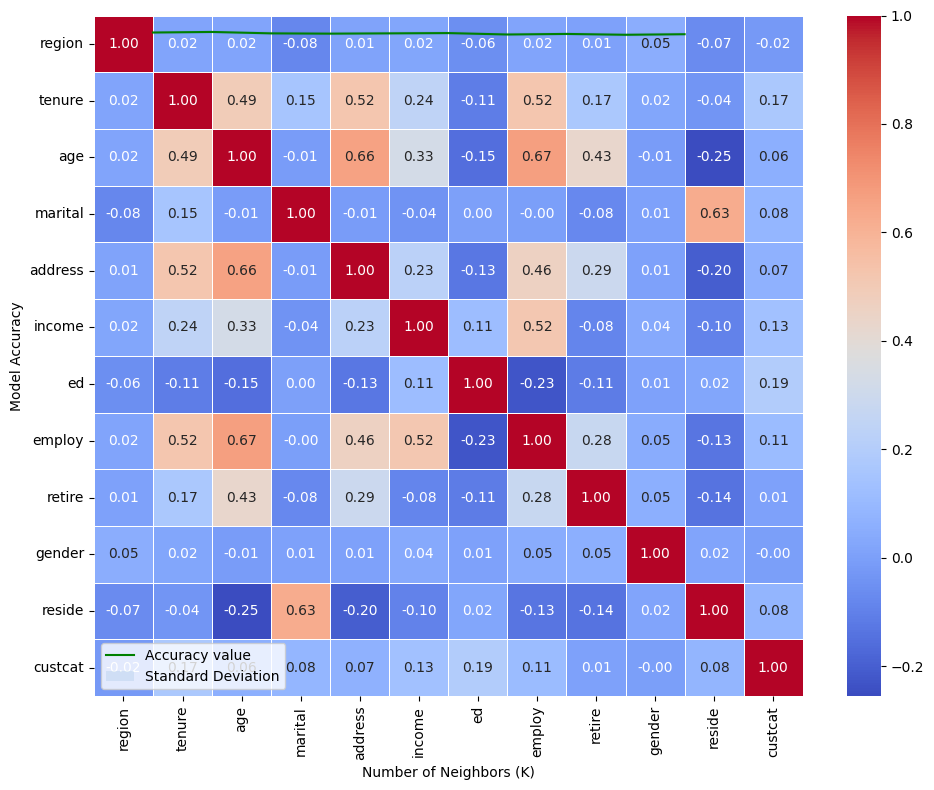

In [13]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.34 with k = 9


However, since this graph is still rising, there can be a chance that the model will give a better performance with an even higher value of k.

In [16]:
k = 30
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.385


In [17]:
k = 100
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


In [18]:
Ks = 30
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

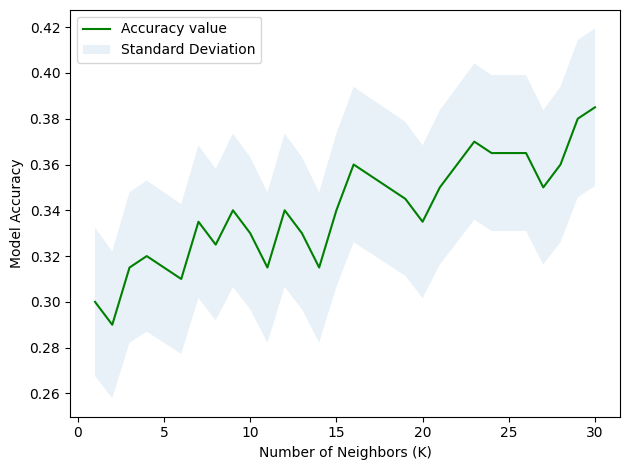

In [19]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.385 with k = 30


In [21]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

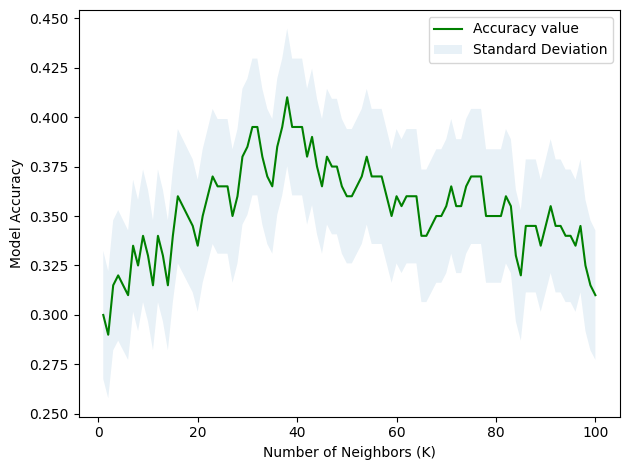

In [22]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.41 with k = 38


When k is small (e.g., k=1), the model is highly sensitive to the individual points in the dataset. The prediction for each point is based on its closest neighbor, which can lead to highly specific and flexible boundaries. This leads to overfitting on the training data, meaning the model will perform very well on the training set, potentially achieving 100% accuracy. However, it may generalize poorly to unseen data. When k is large, the model starts to take into account more neighbors when making predictions. This has two main consequences:

    Smoothing of the Decision Boundary: The decision boundary becomes smoother, which means the model is less sensitive to the noise or fluctuations in the training data.
    Less Specific Predictions: With a larger k, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.

As a result, the model starts to become less flexible, and its ability to memorize the training data (which can lead to perfect accuracy with small k) is reduced.

The weak performance on the model can be due to multiple reasons. 1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation. 2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN. 3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours. 